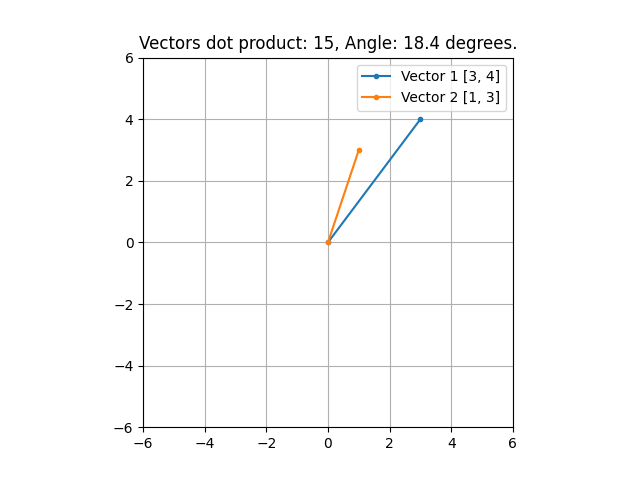

In [101]:
%matplotlib widget

import pandas as pd
import numpy as np
from math import acos, pi
import matplotlib.pyplot as plt

grid_min = -6
grid_max = 6

def vector_angle(v1, v2):
    """Compute the angle between the two vectors"""
    radians = acos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    return round(radians * 180/pi, 1)

def plot_line(vector, label):    
    return plt.plot([0,vector[0]], [0, vector[1]], label=label, marker=".")

def get_title():
    return f"Vectors dot product: {np.dot(v1, v2)}, Angle: {vector_angle(v1,v2)} degrees."

def get_legend(which_vector, vector):
    return f"{which_vector} {vector}"
    
v1 = [3,4]
v2 = [1,3]



line_1, = plot_line(v1, get_legend("Vector 1", v1))
line_2, = plot_line(v2, get_legend("Vector 2", v2))
plt.legend()
plt.axis('square')
plt.axis(( grid_min, grid_max, grid_min, grid_max))
plt.title(get_title())
plt.grid()
plt.interactive(True)
plt.show()

In [103]:
from IPython.display import display
from ipywidgets import interact, interact_manual, interactive

def update_fn1(**kwargs):    
    global line_1
    slider_values = kwargs
    x_val = kwargs["v1_x"]
    v1[0] = x_val
    line_1.set_xdata([0, x_val])
    line_1.set_label(get_legend("Vector 1", v1))
    plt.legend()
    plt.draw()
    plt.title(get_title())
    return kwargs

def update_fn2(**kwargs):   
    # global line_1
    slider_values = kwargs
    y_val = kwargs["v1_y"]
    v1[1] = y_val
    print(y_val)
    line_1.set_ydata([0, y_val])
    line_1.set_label(get_legend("Vector 1", v1))
    plt.legend()
    plt.draw()
    plt.title(get_title())
    return kwargs
    slider_values = kwargs
    # print(slider_values)
    return kwargs


slider_config1 = widgets.IntSlider(min=-6, max=6, step=1, value=v1[0])
slider_config2 = widgets.IntSlider(min=-6, max=6, step=1, value=v1[1])

w1 = interactive(update_fn1, v1_x=slider_config1);
w2 = interactive(update_fn2, v1_y=slider_config2);

display(w1)
display(w2)

# w = interactive(update_fn, a=2, b=2)
# display(w)

interactive(children=(IntSlider(value=-1, description='v1_x', max=6, min=-6), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=5, description='v1_y', max=6, min=-6), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=2, description='a', max=6, min=-2), IntSlider(value=2, description='b', …

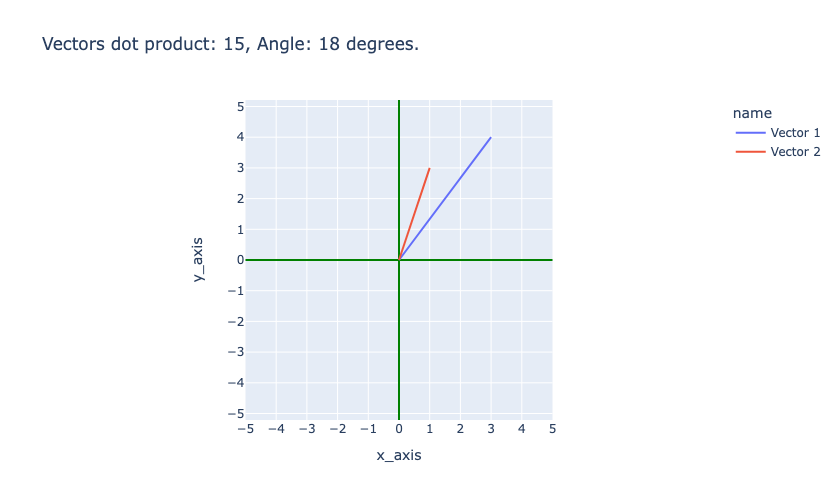

In [88]:
import plotly.express as px
import pandas as pd
import numpy as np
from math import acos, pi
import ipywidgets as widgets
from IPython.display import display

from ipywidgets import interact, interact_manual, interactive

v1 = [3,4]
v2 = [1,3]

def f(**kwargs):    
    global v1, v2
    v1[0] = kwargs['a']
    global df
    #print(df.index)
    #print(df.loc["x_axis", 1])
    print(df)
    print(df.iloc[1,1])
    df.iloc[1,1] = 8
    
    print(fig.data)
    with fig.batch_update():
        fig.data[0]["x"] = np.array([0, 8])
    slider_values = kwargs
    print(slider_values)
    return kwargs

# interact(f, x=widgets.IntSlider(min=-5, max=5, step=1, value=3));


w = interactive(f, a=2, b=2)
display(w)


v1 = [3,4]
v2 = [1,3]

def vectors_to_dataframe(v1, v2):
    """Puts v1 and v2 in a labled DataFrame, in standard position"""
    
    
    # Each point begins at zero, ends at x value of vector
    x = np.array([0,v1[0],0,v2[0]])
    
    # Each point begins at zero, ends at y value of vector
    y = np.array([0,v1[1],0,v2[1]])
    
    labels = ["Vector 1", "Vector 1", "Vector 2", "Vector 2"]
    return pd.DataFrame(dict(x_axis=x, y_axis=y,name=labels))

def vector_angle(v1, v2):
    """Compute the angle between the two vectors"""
    radians = acos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    return int(radians * 180/pi)


df = vectors_to_dataframe(v1, v2)

title = f"Vectors dot product: {np.dot(v1, v2)}, Angle: {vector_angle(v1,v2)} degrees."
fig = px.line(df, x="x_axis", y="y_axis", color="name", width=500, height=500, title=title)


common_config = dict(tickmode="linear", dtick=1.0, range=[-5,5],  zerolinecolor="Green")
fig.update_layout(xaxis=common_config, yaxis=common_config)
fig.update_xaxes(constrain="domain",)
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)

fig.show()